In [1]:
import numpy as np
from matplotlib import pyplot as plt
import csv
from scipy.misc import imresize
%matplotlib inline

Чтение данных. Изображения записаны в байтовом массиве, в котором первые 2 байта хранят размеры (ширину и высоту), после которых идёт по байту на пиксель изображения, выписаного построчно. Метка класса - строка формата "источник_название"

In [2]:
train_data = np.fromfile("trainImages.dmp", dtype=np.uint8)
train_labels = []
with open("trainLabels.txt", "rt") as csvfile:
    values = csv.reader(csvfile, delimiter=',')
    for value in values:
        train_labels.append(value[1])
train_labels=train_labels[1:]

In [3]:
def parse_image_data(trainData):
    i = 0
    images = []
    while i < len(trainData):
        width = trainData[i]
        i += 1
        height = trainData[i]
        i += 1
        size = int(width) * height
        image = trainData[i:i + size]
        i += size
        images.append(image.reshape(width, height))
    return images

In [4]:
train_data = parse_image_data(train_data)

Посмотрим на произвольный элемент обучающей выборки

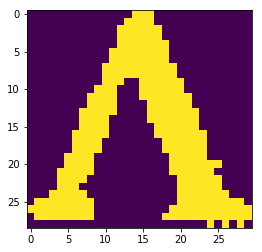

Greek_Lambda


In [5]:
index = 1234
plt.imshow( train_data[index] )
plt.show()
print(train_labels[index])

Считаем тестовую выборку: формат хранения такой же как у обучающей

In [6]:
test_data = np.fromfile("testImages.dmp", dtype=np.uint8)
test_data = parse_image_data(test_data)

Посмотрим на произвольный элемент тестовой выборки

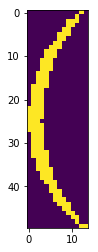

In [7]:
index = 100
plt.imshow( test_data[index] )
plt.show()

В качестве базового решения рассмотрим неоптимальный псевдо-растровый классификатор: изображение 14x14 в качестве признаков и модель KNN в качестве итогового классификатора. Приведение к размеру производим напрямую.

In [8]:
from skimage.transform import resize

/home/islamov/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


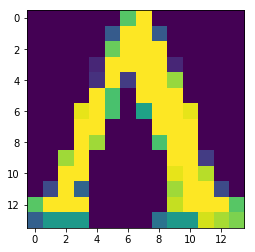

In [9]:
plt.imshow( resize(train_data[1234], (14, 14)) )
plt.show()

/home/islamov/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


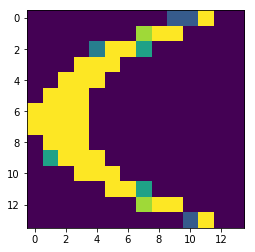

In [10]:
plt.imshow( resize(test_data[100], (14, 14)) )
plt.show()

Столь непосредственно приводить размеры изображения, естественно, плохо - приемлимо лишь для базового решения

In [11]:
size = 20
train_data_resized = list( map( lambda image: np.ravel(resize(image, (size, size))), train_data ) )
test_data_resized = list( map( lambda image: np.ravel(resize(image, (size, size))), test_data ) )

/home/islamov/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [12]:
print(7)

7


In [13]:
from sklearn.neighbors import KNeighborsClassifier

Предупреждение: обучение и классификация могут занять достаточно много времени

In [14]:
clf = KNeighborsClassifier(n_jobs=-1, metric='manhattan')

In [15]:
clf.fit(train_data_resized, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
labels_predicted = clf.predict(test_data_resized)

Запишем результат в файл

In [20]:
f = open("baselineKNN.txt","w")
f.write("Id,Category\n")
for i, label in enumerate(labels_predicted):
    f.write(str(i) + "," + label + "\n")
f.close()